In [3]:
#all the imports
import nltk
import torch
import random
import pandas as pd
from afinn import Afinn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from transformers import pipeline
from transformers import RobertaTokenizerFast
from torch.utils.data import DataLoader, TensorDataset



AFINN Testing accuracy: 0.7026
AFINN Testing F1 score: 0.7435
AFINN Testing precision: 0.6537
AFINN Testing recall: 0.8619
AFINN Testing confusion matrix:
[[13444 11303]
 [ 3418 21335]]
AFINN Classification Report:
               precision    recall  f1-score   support

    negative       0.80      0.54      0.65     24747
    positive       0.65      0.86      0.74     24753

    accuracy                           0.70     49500
   macro avg       0.73      0.70      0.69     49500
weighted avg       0.73      0.70      0.69     49500



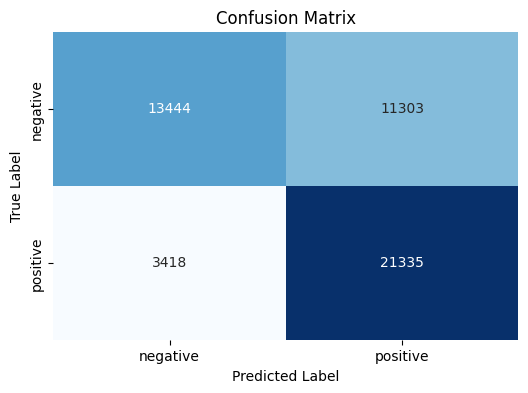

In [4]:
#testing AFINN Model
dataset = pd.read_csv('dataset.csv')

# Convert positive/negative to binary 1 and 0
dataset['sentiment'] = dataset['sentiment'].apply(lambda x: 'positive' if x == 'positive' else 'negative')

#Since this model doesn't require training I'm using the enitre dataset to test for the performance metrics
X_train, X_test, y_train, y_test = train_test_split(dataset['review'], dataset['sentiment'], test_size=0.99) 

# Initialize AFINN model
afinn = Afinn()

# Analyze sentiments for testing set
y_pred_test = [afinn.score(text) for text in X_test]

# Convert predicted scores to sentiment labels
y_pred_test = ['positive' if score >= 0 else 'negative' for score in y_pred_test]

# Calculate accuracy and F1 score on testing set
# accuracy_test = accuracy_score(y_test, y_pred_test)
# f1_test = f1_score(y_test, y_pred_test, pos_label='positive')

# print(f'AFINN Testing accuracy: {accuracy_test:.4f}')
# print(f'AFINN Testing F1 score: {f1_test:.4f}')


accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, pos_label='positive')
precision_test = precision_score(y_test, y_pred_test, pos_label='positive')
recall_test = recall_score(y_test, y_pred_test, pos_label='positive')
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)



print(f'AFINN Testing accuracy: {accuracy_test:.4f}')
print(f'AFINN Testing F1 score: {f1_test:.4f}')
print(f'AFINN Testing precision: {precision_test:.4f}')
print(f'AFINN Testing recall: {recall_test:.4f}')
print(f'AFINN Testing confusion matrix:\n{confusion_test}')
print('AFINN Classification Report:\n', classification_report_test)


# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_test, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

VADER Testing accuracy: 0.6964
VADER Testing F1 score: 0.7382
VADER Testing precision: 0.6489
VADER Testing recall: 0.8560
VADER Testing confusion matrix:
[[13282 11465]
 [ 3564 21189]]
VADER Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.54      0.64     24747
    positive       0.65      0.86      0.74     24753

    accuracy                           0.70     49500
   macro avg       0.72      0.70      0.69     49500
weighted avg       0.72      0.70      0.69     49500



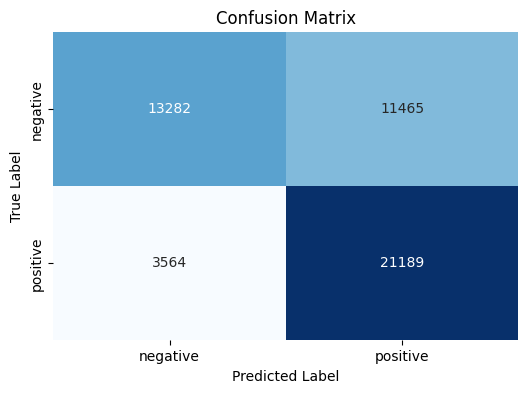

In [5]:
#for VADER

# Initialize VADER model
vader = SentimentIntensityAnalyzer()

# Analyze sentiments for testing set
y_pred_test = [vader.polarity_scores(text)['compound'] for text in X_test]

# Convert predicted scores to sentiment labels
y_pred_test = ['positive' if score >= 0 else 'negative' for score in y_pred_test]

accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, pos_label='positive')
precision_test = precision_score(y_test, y_pred_test, pos_label='positive')
recall_test = recall_score(y_test, y_pred_test, pos_label='positive')
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)



print(f'VADER Testing accuracy: {accuracy_test:.4f}')
print(f'VADER Testing F1 score: {f1_test:.4f}')
print(f'VADER Testing precision: {precision_test:.4f}')
print(f'VADER Testing recall: {recall_test:.4f}')
print(f'VADER Testing confusion matrix:\n{confusion_test}')
print('VADER Classification Report:\n', classification_report_test)


# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_test, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

Naïve Bayes Testing accuracy: 0.8532
Naïve Bayes Testing F1 score: 0.8497
Naïve Bayes Testing precision: 0.8792
Naïve Bayes Testing recall: 0.8221
Naïve Bayes Testing confusion matrix:
[[4382  570]
 [ 898 4150]]
Naïve Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.88      0.86      4952
    positive       0.88      0.82      0.85      5048

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



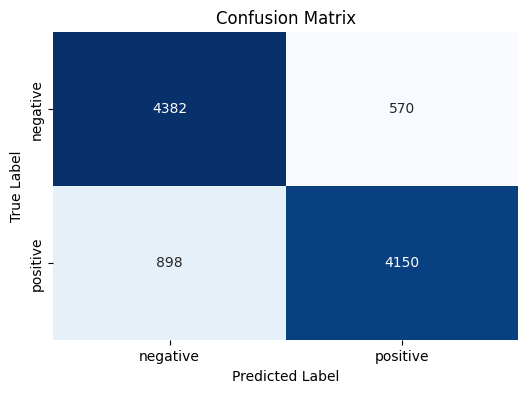

In [6]:
#For NAIVE bayes


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset['review'], dataset['sentiment'], test_size=0.2)

# Create bag of words vectors for training set
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# Create bag of words vectors for testing set
X_test_vec = vectorizer.transform(X_test)

# Predict sentiment labels for testing set
y_pred_test = nb.predict(X_test_vec)

# # Calculate accuracy and F1 score on testing set
# accuracy_test = accuracy_score(y_test, y_pred_test)
# f1_test = f1_score(y_test, y_pred_test)

# print(f'\n\nNaive Testing accuracy: {accuracy_test:.3f}')
# print(f'Naive Testing F1 score: {f1_test:.3f}')



accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, pos_label='positive')
precision_test = precision_score(y_test, y_pred_test, pos_label='positive')
recall_test = recall_score(y_test, y_pred_test, pos_label='positive')
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)



print(f'Naïve Bayes Testing accuracy: {accuracy_test:.4f}')
print(f'Naïve Bayes Testing F1 score: {f1_test:.4f}')
print(f'Naïve Bayes Testing precision: {precision_test:.4f}')
print(f'Naïve Bayes Testing recall: {recall_test:.4f}')
print(f'Naïve Bayes Testing confusion matrix:\n{confusion_test}')
print('Naïve Bayes Classification Report:\n', classification_report_test)


# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_test, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()
